# 데이터 수집

# 기사 내용 전처리

In [1]:
import pandas as pd
df = pd.read_json('./data/정세균.json')

In [3]:
len(df)

2242

In [5]:
# 현재 신문사 종류 43개, 신문사 갯수가 추가되면 전처리 추가 
#'조선일보|뉴시스|아시아경제|이데일리|뉴스1|SBS|오마이뉴스|중앙일보|매일경제|문화일보|세계일보|머니투데이|서울경제|데일리안|KBS|MBN|YTN|프레시안|디지털타임스|국민일보(과거)|국민일보|헤럴드경제|한국일보|아이뉴스24|노컷뉴스|연합뉴스TV|서울일보|동아일보|한국경제|미디어오늘(과거)|미디어오늘|조세일보|파이낸셜뉴스|경향신문|채널A|머니S|TVCHOSUN|한겨례|전자신문|SBSCNBC|한국경제TV|조선비즈|ZDNetKorea'

import re
def pre_process(text):
    # 이메일 등장하면, 그 뒷문장 모두 삭제 
    text = re.sub("[a-zA-Z0-9]+\@[a-zA-Z0-9]+\.[a-z]{1,3}.[a-z]{1,3}.+",'',text).strip()
    text = re.sub('\(.+?연합뉴스\)','',text).strip() # (서울=연합뉴스)
    text = re.sub('\(.+?연합인포맥스\)','',text).strip()
    text = re.sub('\(.+?이데일리\)','',text).strip()
    text = re.sub('\(.+?조선일보\)','',text).strip()
    text = re.sub('\(.+?뉴시스\)','',text).strip()
    text = re.sub('\(.+?뉴스1\)','',text).strip()
    text = re.sub('\(.+?SBS\)','',text).strip()
    text = re.sub('\(.+?오마이뉴스\)','',text).strip()
    text = re.sub('\(.+?중앙일보\)','',text).strip()
    text = re.sub('\(.+?매일경제\)','',text).strip()
    text = re.sub('\(.+?문화일보\)','',text).strip()
    text = re.sub('\(.+?세계일보\)','',text).strip()
    text = re.sub('\(.+?머니투데이\)','',text).strip()
    text = re.sub('\(.+?서울경제\)','',text).strip()
    text = re.sub('\(.+?데일리안\)','',text).strip()
    text = re.sub('\(.+?KBS\)','',text).strip()
    text = re.sub('\(.+?MBN\)','',text).strip()
    text = re.sub('\(.+?YTN\)','',text).strip()
    text = re.sub('\(.+?프레시안\)','',text).strip()
    text = re.sub('\(.+?디지털타임즈\)','',text).strip()
    text = re.sub('\(.+?국민일보(과거)\)','',text).strip()
    text = re.sub('\(.+?국민일보\)','',text).strip()
    text = re.sub('\(.+?헤드럴경제\)','',text).strip()
    text = re.sub('\(.+?한국일보\)','',text).strip()
    text = re.sub('\(.+?아이뉴스24\)','',text).strip()
    text = re.sub('\(.+?노컷뉴스\)','',text).strip()
    text = re.sub('\(.+?연합뉴스TV\)','',text).strip()
    text = re.sub('\(.+?서울일보\)','',text).strip()
    text = re.sub('\(.+?동아일보\)','',text).strip()
    text = re.sub('\(.+?한국경제\)','',text).strip()
    text = re.sub('\(.+?미디어오늘(과거)\)','',text).strip()
    text = re.sub('\(.+?미디어오늘\)','',text).strip()
    text = re.sub('\(.+?조세일보\)','',text).strip()
    text = re.sub('\(.+?파이낸셜뉴스\)','',text).strip()
    text = re.sub('\(.+?경향신문\)','',text).strip()
    text = re.sub('\(.+?채널A\)','',text).strip()
    text = re.sub('\(.+?머니S\)','',text).strip()
    text = re.sub('\(.+?TVCHOSUN\)','',text).strip()
    text = re.sub('\(.+?한겨례\)','',text).strip()
    text = re.sub('\(.+?전자신문\)','',text).strip()
    text = re.sub('\(.+?SBSCNBC\)','',text).strip()
    text = re.sub('\(.+?한국경제TV\)','',text).strip()
    text = re.sub('\(.+?조선비즈\)','',text).strip()
    text = re.sub('\(.+?ZDNetKorea\)','',text).strip()
    text = re.sub('\[.+?\]','',text).strip()
    text = re.sub('\(사진.+?\)','',text).strip()
    # 신문사 이름 삭제 
    text = re.sub('조선일보|뉴시스|아시아경제|이데일리|뉴스1|SBS|오마이뉴스|중앙일보|매일경제|문화일보|세계일보|머니투데이|서울경제|데일리안|KBS|MBN|YTN|프레시안|디지털타임스|국민일보(과거)|국민일보|헤럴드경제|한국일보|아이뉴스24|노컷뉴스|연합뉴스TV|서울일보|동아일보|한국경제|미디어오늘(과거)|미디어오늘|조세일보|파이낸셜뉴스|경향신문|채널A|머니S|TVCHOSUN|한겨례|전자신문|SBSCNBC|한국경제TV|조선비즈|ZDNetKorea','',text).strip()
    # 000 기자, 000  가자, 000기자 삭제
    text = re.sub('[ㄱ-힑]+ 기자|[ㄱ-힑]+  기자|[ㄱ-힑]+기자','',text).strip()    
    # 특수기호 삭제
    text = re.sub('[^a-zA-Z0-9ㄱ-힗.,”“"% ]','',text).strip()
    text = re.sub('[0-9]{1,4}.[0-9]{1,2}.[0-9]{1,2}.','',text).strip()
    return text
df['content'] = df['content'].map(lambda x : pre_process(x))
df = df.dropna()
df.to_csv('./data/정세균_전처리.csv',index = False)

In [6]:
len(df)

2242

# 토큰화 엔그램 
- mecab 사용 : https://konlpy-ko.readthedocs.io/ko/v0.4.3/api/konlpy.tag/

In [86]:
import pandas as pd
import numpy as np
df = pd.read_csv('./data/정세균_전처리.csv')
df = df.replace(np.nan, '', regex=True)

In [87]:
len(df)

2242

In [88]:
def getStopwords() :
    f = open('./data/stopwords.txt', 'r',-1,'utf-8')
    stop_word = []

    while True:
        line = f.readline()
        stop_word.append(line.strip())
        if not line: break

    return stop_word 
stop_word = getStopwords()

In [89]:
def getStoppos() :
    f = open('./data/stoppos.txt', 'r',-1,'utf-8')
    stop_word = []

    while True:
        line = f.readline()
        stop_word.append(line.strip())
        if not line: break

    return stop_word 
stop_pos = getStoppos()

In [90]:
from konlpy.tag import Mecab
def makenouns(text):
    mecab = Mecab()
    text_info = mecab.pos(text)
    nouns = []
    noun_tags = ['NNG', 'NNP', 'NNB', 'NR', 'NP']
    prev_noun = ''
    for word, tag in text_info:
        #print(word, tag)
        if tag in noun_tags:
            prev_noun += (word + ' ')

        elif prev_noun:
            nouns.append(prev_noun)
            prev_noun = ''
    return nouns
df['nouns']=''
for i in range(len(df)):
    if i%100==0:
        print(i)
    
    df['nouns'][i] = makenouns(df['content'][i])


0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200


# 불용어 처리 + 한글자 제거 
- 명사만 뽑았기때문에 불용어는 별로 없을 듯 ,

In [91]:
for j in range(len(df)):
    if j%100==0:
        print(j)
    tmp_list=[]
    for i in range(len(df['nouns'][j])):
        if len(df['nouns'][j][i])>1:
            WD = df['nouns'][j][i]
            if WD not in stop_word:
                tmp_list.append(df['nouns'][j][i])
    df['nouns'][j] = tmp_list

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200


In [92]:
df.to_csv('./data/정세균_nouns2.csv',index = False)

In [93]:
import pandas as pd
df = pd.read_csv('./data/정세균_nouns2.csv')

In [94]:
import gensim
from gensim import corpora
from gensim.models import LdaModel
from gensim.models import TfidfModel
from gensim.models.coherencemodel import CoherenceModel
import pyLDAvis.gensim
import matplotlib.pyplot as plt
%matplotlib inline 

In [95]:
# 전체 토큰을 리스트로 news_doc_ls에 저장 
news_doc_ls = df['nouns'].to_list()
# news_doc_ls를 ','로 split
news_doc = [doc.split(',') for doc in news_doc_ls]
# dictionary 생성
dictionary = corpora.Dictionary(news_doc)
# corpus 생성 
corpus = [dictionary.doc2bow(text) for text in news_doc]
# TF-IDF로 corpus 변경 
tfidf_model = TfidfModel(corpus)
corpus = tfidf_model[corpus]

In [96]:
# 최적의 토픽 갯수 정하기
def decisionTopicNum(start, stop, size):

    model_list = []
    coherence_values = []
    topic_n_list = []
    perplexity_values = []

    # 멀티 프로세싱 코드 추가하기 
    for num_topics in range(start, stop, size):
        model = LdaModel(corpus, num_topics=num_topics, id2word = dictionary) # 이부분 
        model_list.append(model)

        coherencemodel = CoherenceModel(model=model, texts=news_doc, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
        topic_n_list.append(num_topics)
        perplexity_values.append(model.log_perplexity(corpus))
        print(num_topics)

    return model_list, coherence_values, perplexity_values

# 최적의 토픽 갯수를 정하기 위한 그래프 그리기
def decisionPlotTopicNum(start, stop, size):

    model_list, coherence_values, perplexity_values = decisionTopicNum(start, stop, size)
    x = range(start, stop, size)
    fig, ax1 = plt.subplots()
    color = 'tab:blue'
    ax1.set_xlabel("Number of Topics")
    ax1.set_ylabel("Coherence score", color=color)
    ax1.plot(x, coherence_values, color=color)
    ax1.tick_params(axis='y', labelcolor=color)
    ax2 = ax1.twinx()  # ax1과 ax2는 x축을 공유함

    color = 'tab:red'
    ax2.set_ylabel('Perplexity score', color=color)  
    ax2.plot(x, perplexity_values, color=color)
    ax2.tick_params(axis='y', labelcolor=color)

    fig.tight_layout() 
    plt.show()

5
10
15
20
25
30
35
40
45
50


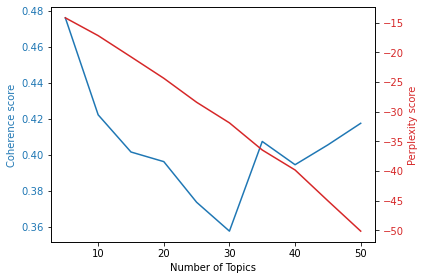

In [60]:
decisionPlotTopicNum(5,51,5) 

In [97]:
def ldaTFIDF(num_topics):
    ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = num_topics, id2word = dictionary, passes=5)
    topics = ldamodel.print_topics(num_words=10)
    
    for topic in topics:
        print(topic)
    topic_prob = ldamodel[corpus]
    
    return ldamodel,topic_prob,topic

In [98]:
ldamodel,topic_prob,topic = ldaTFIDF(20)

(0, '0.001*" \'유 의원 \'" + 0.001*" \'오세훈 법 \'" + 0.000*"[\'오늘 \'" + 0.000*" \'선대위 \'" + 0.000*" \'김 후보 \'" + 0.000*" \'지역 주민 등 \'" + 0.000*" \'시 \'" + 0.000*" \'강북 \'" + 0.000*" \'경복궁역 \'" + 0.000*" \'누리 당과 \'"')
(1, '0.004*" \'후보 \'" + 0.003*" \'것 \'" + 0.002*" \'국민 \'" + 0.002*" \'종로 \'" + 0.002*" \'김 대표 \'" + 0.002*" \'누리 \'" + 0.002*" \'총선 \'" + 0.002*" \'오세훈 \'" + 0.002*" \'당 \'" + 0.002*" \'민주 \'"')
(2, '0.001*" \'야권 단일 \'" + 0.000*" \'조국 \'" + 0.000*" \'띠 \'" + 0.000*" \'불리 \'" + 0.000*" \'부담 \'" + 0.000*" \'노 패권주의 \'" + 0.000*" \'안철수 국민 \'" + 0.000*" \'김현정 \'" + 0.000*" \'희생양 \'" + 0.000*" \'야권 연대 \'"')
(3, '0.001*" \'녹색당 \'" + 0.000*" \'광우병 \'" + 0.000*" \'작성자 영원 속 \']" + 0.000*"[\'정세균 의원 \'" + 0.000*" \'선거 운동원 \'" + 0.000*" \'하승수 위원장 \'" + 0.000*" \'쇠고기 \'" + 0.000*" \'서울시 의원 \'" + 0.000*" \'소 \'" + 0.000*" \'당 창당 발기인 \'"')
(4, '0.001*" \'사주 \'" + 0.000*" \'옥바라지 골목 \'" + 0.000*" \'집회 \'" + 0.000*" \'정세균 의원 국민 \'" + 0.000*" \'조합 측 \'" + 0.000*" \'구역 \'" + 0.000*" \'교수 \'" + 0.0

In [99]:
# 기사별 토픽 붙이기
def TopicList(): 
    topic_prob_list = []
    for i in topic_prob:
        tmp = i
        tmp.sort(key=lambda x: x[1], reverse = True)
        topic_prob_list.append(tmp[0][0])  # 토픽 0번~9번

    df['topic'] = topic_prob_list
    return df

TopicList()

,url,author,date,title,content,nouns,topic
0,https://blog.naver.com/PostView.nhn?blogId=ywk...,ywkimd,2015-02-02 10:32:00,미리 본 김용판 회고록 정치는 삼류 수준,국정원 여직원 댓글 사건 수사를 은폐축소한 혐의로 기소돼 29일 대법원에서 무죄가 ...,"['국정원 ', '원 댓글 사건 수사 ', '은폐 축소 ', '혐의 ', '기소 '...",1
1,https://blog.naver.com/PostView.nhn?blogId=jjj...,jjjoojjji,2015-01-03 03:54:00,"민주묘지 박지원 당대표 후보, 국립 5·18민주묘지 참배d2","국립518민주묘지에서 새정치민주연합 당 대표에 출마한 박지원, 박주선, 주승용 최고...","['국립 ', '민주 묘지 ', '정치 민주 연합 당 대표 ', '출마 ', '박지...",1
2,https://blog.naver.com/PostView.nhn?blogId=ver...,vera010101,2015-01-03 08:48:00,YTN / 새정치 전당대회 비노 VS. 친노 계파전쟁,피할 수 없다고 결론 내렸습니다. 당을 살리기 위해 몸을 던질 것을 결심했습니다. ...,"['수 ', '결론 ', '당 ', '몸 ', '것 ', '결심 ', '문재인 ',...",1
3,https://blog.naver.com/PostView.nhn?blogId=cho...,chonchu,2015-01-05 11:04:00,"박 대통령 국정수행 지지도, 회복세 44.8%","박 대통령 국정수행 지지도, 회복세 44.8% 박근혜 대통령 국정수행 평가가 긍정 ...","['박 대통령 국정 수행 지지 ', '회복세 ', '박근혜 대통령 국정 수행 평가 ...",1
4,https://blog.naver.com/PostView.nhn?blogId=jwp...,jwp615,2015-01-05 11:12:00,"박지원 당대표 후보, 전북도당 신년인사회 발언요지",전북도당 신년인사회 발언요지2015. 1. 5. 月 전북이 소외되지 않도록 협력...,"['전북 도당 신년 ', '사회 발언 요지 ', '月 전북 ', '소외 ', '협력...",1
...,...,...,...,...,...,...,...
2237,https://blog.naver.com/PostView.nhn?blogId=tse...,tseoul,2016-04-12 21:07:00,종로 막판유세...민심의 향방은?_티브로드서울,초박빙 그리고 혼전이라는 단어가 붙은종로에서는 후보들이 선거운동 마지막까지 유세차량...,"['박빙 ', '혼전 ', '단어 ', '종로 ', '후보 ', '선거 운동 마지막...",1
2238,https://blog.naver.com/PostView.nhn?blogId=whi...,white710601,2016-04-12 21:25:00,시험대 오른 정치 거물들… 누가 살아 돌아올까,413 총선에서 공천파동을 겪은 새누리당은 영남권을 중심으로 한 탈당파 무소속 바람...,"['총선 ', '공천 파동 ', '누리 당 ', '영남 ', '중심 ', '당파 '...",1
2239,https://blog.naver.com/PostView.nhn?blogId=hae...,haeun_cho,2016-04-12 22:15:00,내일 투표! 주님 기쁘시게 합시다!,한국교회와 나라의 위기가 닥치기 전에 미리 막아야합니다 내일 소중한 한표 하나님께서...,"['한국 교회 ', '나라 ', '위기 ', '전 ', '표 하나님 ', '보시기 ...",1
2240,https://blog.naver.com/PostView.nhn?blogId=glo...,glorylake,2016-04-12 22:28:00,"오세훈 vs 정세균, 황춘자 vs 진영 최종정리",오세훈 vs 정세균 오세훈을 안 뽑으면 대한민국의 미래를 포기하는 것 대선후보...,"['오세훈 ', '정세균 오세훈 ', '대한민국 ', '미래 ', '포기 ', '것...",1


In [ ]:
import pyLDAvis.gensim as gensimvis
prepared_data = gensimvis.prepare(ldamodel, corpus, dictionary)
pyLDAvis.display(prepared_data)


In [ ]:
topic_count = pd.DataFrame(df['topic'].value_counts().reset_index(name = 'count'))\
              .sort_values(by='index').rename(columns={'index':'topic'}).reset_index(drop=True)

In [ ]:
topic_count

In [ ]:
def plotTopic(topic_count):
    x1 = topic_count['topic']
    y1 = topic_count['count']
    plt.xlabel("Topic number")
    plt.ylabel("Count")
    topic_graph = plt.bar(x1,y1,color='red')
    return topic_graph
plotTopic(topic_count)

In [ ]:
df.head(1)

In [ ]:
df.to_csv('./data/정세균_토픽모델링2.csv',index = False)

In [ ]:
import pandas as pd
df = pd.read_csv('./data/정세균_토픽모델링2.csv')
df.head()

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt 
import pandas as pd 
import math 
import os   
def makeTopicmodeling(df,count):
    count = count
    for m in range(0,count):
        try:
            news_topic = df[df['topic']==m]
            news_topic = news_topic.reset_index(drop = True)

            if len(news_topic)>10:
                tmp_list = []
                for i in range(len(news_topic)):
                    tmp = news_topic['nouns'][i]
                    tmp_list.append(tmp)

                tmp2_list = []
                for j in range(len(tmp_list)):
                    tmp2 = tmp_list[j].split(',')
                    tmp2_list.append(tmp2)

                answer = sum(tmp2_list,[])

                tmp3_list=[]
                for n in range(len(answer)):
                    tmp3 = answer[n]
                    tmp3_list.append(tmp3)


                tmp_df = pd.DataFrame(tmp3_list)[0].value_counts()
                TMP_df = pd.DataFrame(tmp_df)
            #     TMP_df = TMP_df.reset_index()
            #     # 최소 빈도수 변경 가능
            #     TMP_df = TMP_df[TMP_df[0]>=5]
            #     TMP_df = TMP_df.set_index('index')
                TMP = TMP_df.to_dict()

                #wordCloud생성
                #한글꺠지는 문제 해결하기위해 font_path 지정
                wc = WordCloud(font_path='c:/Windows/Fonts/malgun.ttf', background_color='white', 
                               width=800, height=600).generate_from_frequencies(TMP[0]) # colormap = matplotlib.cm.Reds
                plt.figure(figsize=(10, 8))
                plt.axis('off')
                plt.title('< Topic '+str(m)+' >', fontsize = 15, position =(0.5,1.0+0.05))
                plt.imshow(wc, interpolation = 'bilinear')
                wordcloud_plt = plt.show()
            else:
                pass
            
        except Exception as ex:
            print(ex)
            
    return wordcloud_plt   

In [ ]:
makeTopicmodeling(df,20)

In [ ]:
df.head(1)

In [81]:
a = ['a','b']
b = ['ㄱ','ㄴ']
A = zip(a,b)

In [82]:
print(A)

In [83]:
for k in zip(a, b):
    print(k)

('a', 'ㄱ')
('b', 'ㄴ')


In [84]:
df.head(1)

,url,author,date,title,content,nouns,topic
0,https://blog.naver.com/PostView.nhn?blogId=ywk...,ywkimd,2015-02-02 10:32:00,미리 본 김용판 회고록 정치는 삼류 수준,국정원 여직원 댓글 사건 수사를 은폐축소한 혐의로 기소돼 29일 대법원에서 무죄가 ...,"['국정원', '원댓글사건수사', '은폐축소', '혐의', '기소', '대법원', ...",15


In [85]:
df['nouns'][0]

"['국정원', '원댓글사건수사', '은폐축소', '혐의', '기소', '대법원', '무죄', '확정', '김용판', '전서울경찰청장', '동안수사재판과정', '소회', '회고록', '출간', '예정', '청문회선서', '거부', '제목', '회고록', '용지', '분량', '국정원', '원댓글사건', '실체', '재판과정', '청장', '경찰생활', '본지', '단독', '입수', '회고록', '청장', '검찰', '집단', '도덕불감증', '국회', '삼류', '비판', '사건당시수서경찰서수사과장', '댓글사건수사은폐축소', '폭로', '정치민주연합권은희의원', '비판', '상당부분할애', '권의원', '경찰', '민주당정세균의원', '트위터', '김용판', '엄벌', '상식', '나라', '권은희과장', '정의감', '공무원', '보호', '존경', '정상', '나라', '집필', '책무', '정치', '행동', '진실', '이야기', '거짓', '사명감', '김용판', '서울경찰청장', '회고록', '국정원댓글사건', '일부언론', '단체', '기관', '사람', '선입견', '진실', '거짓', '위증', '난무', '사건', '규정', '경찰관', '욕망', '폭로', '정치', '인터넷', '언론', '보수진영', '진보진영', '좌익진영등', '총출동', '논란', '상대', '공격', '국가', '혼란', '대법원', '무죄선고', '애당초야권', '무리', '고발', '검찰', '냉정', '판단', '재판', '처음', '증인', '출석', '경찰관', '실체', '진실', '모순', '폭로', '증언', '사건', '왜곡', '청장', '회고록제목', '댓글사건국회국정조사', '국회사상처음', '증인선서', '거부', '이유', '설명', '국회', '불신때문', '국민', '기관', '국회', '존중', '당시국회', '야권', '불신', '진실', '이유', '위증죄', '고발', '재판', '야당', '평소검찰', '정치검찰', '공격